In [26]:
import math 
import copy 
import matplotlib.pyplot as plt
import numpy as np
import random

# Path Planning

In [19]:
r = 10
c = 10
env = [[0]* r]*c

#Setting Obstacles 
obstacles = [[1,1], [1,2], [1,3], [2,1], [3,1], [1,6], [1,7], [1,8], [2,8], [3,8], [6,8], [7,8], [8,8], [8,7], [8,6], [8,3], [8,2], [8,1], [7,1], [6,1], [3,3], [3,4], [3,5], [6,4], [6,5], [6,6]]

for x in range(r):
    for y in range(c):
        
        if(env[x][y] == obstacles[x]):
            env[x][y] = 1
            
print(env)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


Setting the 10x10 Environment as a List of Lists

In [20]:
env = [[0,0,0,0,0,0,0,0,0,0],
       [0,1,1,1,0,0,1,1,1,0],
       [0,1,0,0,0,0,0,0,1,0],
       [0,1,0,1,0,0,0,0,1,0],
       [0,0,0,1,0,0,1,0,0,0],
       [0,0,0,1,0,0,1,0,0,0],
       [0,1,0,0,0,0,1,0,1,0],
       [0,1,0,0,0,0,0,0,1,0],
       [0,1,1,1,0,0,1,1,1,0],
       [0,0,0,0,0,0,0,0,0,0]]

In [22]:
def AStar(environment, start, end, cost, heuristic):
    return 0

#AStar(env, [0,3], [9,5], 1, function)

# Path Smoothing

In [23]:
original_path = [[0, 0], [0, 1], [0, 2], [1, 2], [2, 2], [3, 2], [4, 2], [5, 2], [5, 3], [5, 4], [5, 5]]
smooth_path = []

In [27]:
def Distance(c1, c2):
    return math.sqrt((c1[0] - c2[0])**2 + (c1[1] - c2[1])**2)

In [24]:
def Smooth(path, weight_path, weight_smooth, tolerance):

    smooth = copy.deepcopy(path)
    while True:
        for x in range(1, len(path)-1):
            for y in range(1, len(path[0])):
                line = weight_path*(path[x][y] - smooth[x][y])
                alpha = weight_smooth*(smooth[x-1][y] - smooth[x][y])
                beta = weight_smooth*(smooth[x+1][y] - smooth[x][y])
            
                smooth[x][y] = smooth[x][y] + line + alpha + beta

        if abs(Distance(path[1], smooth[1])) < tolerance:
            print("[MSG] Tolerance is Greater...")
            break

    #Plotting the lines against eachother
    plt.plot(smooth, label = "Smoothed Line")
    plt.plot(path, label = "Original Path")
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.legend()
    plt.show()

    print("Smooth Line: " + str(smooth))
    return smooth

[MSG] Tolerance is Greater...


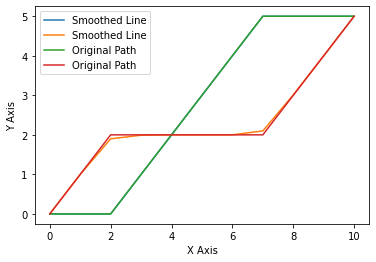

Smooth Line: [[0, 0], [0, 1.0], [0, 1.9], [1, 1.99], [2, 1.999], [3, 1.9999], [4, 1.99999], [5, 2.099999], [5, 3.0099999], [5, 4.0009999899999995], [5, 5]]


[[0, 0],
 [0, 1.0],
 [0, 1.9],
 [1, 1.99],
 [2, 1.999],
 [3, 1.9999],
 [4, 1.99999],
 [5, 2.099999],
 [5, 3.0099999],
 [5, 4.0009999899999995],
 [5, 5]]

In [25]:
Smooth(original_path, 0.5, 0.1, 0.000001)

# PID Control

In [114]:
class Robot(object):
    
    def __init__(self, length= 20.0):
        
        self.x = 0.0
        self.y = 0.0
        self.orientation = 0.0
        self.length = length
        self.steering_noise = 0.0
        self.distance_noise = 0.0
        self.steering_drift = 0.0
        
    def set(self, x, y, orientation):
        
        self.x = x
        self.y = y
        self.orientation = orientation % (2.0 * np.pi)
        
    def noise(self, steering_noise, distance_noise):
        
        self.steering_noise = steering_noise
        self.distance_noise = distance_noise
        
    def set_steering_drift(self, drift):
        
        self.steering_drift = drift
        
    def move(self, steering, distance, tolerance = 0.001, maxangle = np.pi/4.0):
        
        if steering > maxangle:
            steering = maxangle
        if steering < -maxangle:
            steering = -maxangle
        if distance < 0.0:
            distance = 0.0
            
        #Applying Noise
        steeringnoise = random.gauss(steering, self.steering_noise)
        distancenoise = random.gauss(distance, self.distance_noise)
        
        #Steering Drift
        steeringnoise += self.steering_noise
        
        #Movement
        turn = np.tan(steeringnoise)*distancenoise / self.length
        
        if abs(turn) < tolerance:
            
            #Approximate via Straight Line Motion
            self.x += distancenoise * np.cos(self.orientation)
            self.y += distancenoise * np.sin(self.orientation)
            self.orientaion = (self.orientation + turn)%(2.0 * np.pi)
            
        else:
            
            #Approximate via Bicycle Model for Motion
            radius = distancenoise / turn
            turnx = self.x - (np.sin(self.orientation) * radius)
            turny = self.y + (np.cos(self.orientation) * radius)
            self.orientation = (self.orientation + turn) % (2.0 * np.pi)
            self.x = turnx + (np.sin(self.orientation) * radius)
            self.y = turny - (np.cos(self.orientation) * radius)
            
    def __repr__(self):
        return '[x=%.5f y=%.5f orient=%.5f]' % (self.x, self.y, self.orientation)

In [141]:
robot = Robot()
robot.set(0,1,0)
robot.set_steering_drift(10)

In [142]:
def pid_control(robot, tau_p, tau_d, tau_i, n=100, speed = 1.0):
    
    x_trajec = []
    y_trajec = []
    
    prevcte = robot.y
    sum_cte = 0
    
    for _ in range(n):
        
        cte = robot.y
        cte_diff = cte-prevcte
        prevcte = cte
        sum_cte += cte
        
        steer = -tau_p * cte - tau_d * cte_diff - tau_i * sum_cte
        robot.move(steer, speed)
        
        x_trajec.append(robot.x)
        y_trajec.append(robot.y)
        
    return x_trajec, y_trajec

In [143]:
x_trajectory, y_trajectory = pid_control(robot, 0.2, 3.0, 0.004)
n = len(x_trajectory)

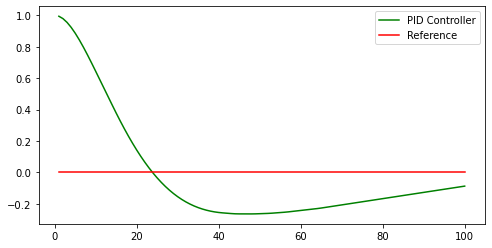

In [144]:
fig, ax1 = plt.subplots(1, 1, figsize=(8,4))
ax1.plot(x_trajectory, y_trajectory, 'g', label = 'PID Controller')
ax1.plot(x_trajectory, np.zeros(n), 'r', label = 'Reference')
plt.legend()